In [1]:
import os

In [2]:
train = 'seg_train/'
validation = 'seg_test/'
prediction = 'seg_pred/'

In [3]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

Using TensorFlow backend.
C:\Users\Zami\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Zami\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Zami\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Zami\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [5]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(150, 150),
        batch_size = 20,
        class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [8]:
validation_generator = test_datagen.flow_from_directory(
        validation,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 6)


In [10]:
history = model.fit_generator(
train_generator,
steps_per_epoch=70,
epochs=30,
validation_data=validation_generator,
validation_steps=150)


Epoch 1/30
70/70 [==============================] - 106s 2s/step - loss: 1.5140 - acc: 0.3871 - val_loss: 1.1020 - val_acc: 0.4960
Epoch 2/30
70/70 [==============================] - 88s 1s/step - loss: 1.2272 - acc: 0.5029 - val_loss: 0.8858 - val_acc: 0.5720
Epoch 3/30
70/70 [==============================] - 87s 1s/step - loss: 1.1410 - acc: 0.5471 - val_loss: 1.2009 - val_acc: 0.5560
Epoch 4/30
70/70 [==============================] - 89s 1s/step - loss: 1.0785 - acc: 0.5857 - val_loss: 1.0670 - val_acc: 0.6023
Epoch 5/30
70/70 [==============================] - 88s 1s/step - loss: 0.9963 - acc: 0.6071 - val_loss: 0.9746 - val_acc: 0.6253
Epoch 6/30
70/70 [==============================] - 88s 1s/step - loss: 1.0010 - acc: 0.6057 - val_loss: 0.9605 - val_acc: 0.6367
Epoch 7/30
70/70 [==============================] - 88s 1s/step - loss: 0.9637 - acc: 0.6357 - val_loss: 0.4786 - val_acc: 0.6767
Epoch 8/30
70/70 [==============================] - 87s 1s/step - loss: 0.9105 - acc: 0.

In [11]:
model.save('intel.h5')

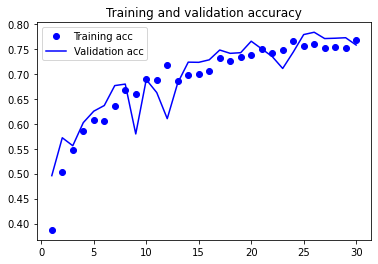

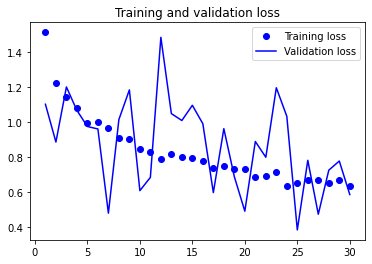

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [21]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(
train,
target_size=(150, 150),
batch_size=32,
class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [23]:
validation_generator = test_datagen.flow_from_directory(
validation,
target_size=(150, 150),
batch_size=32,
class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [27]:
history = model.fit_generator(
train_generator,
steps_per_epoch=70,
epochs=100,
validation_data=validation_generator,
validation_steps=150)

Epoch 1/100
70/70 [==============================] - 155s 2s/step - loss: 0.8932 - acc: 0.6652 - val_loss: 1.0879 - val_acc: 0.7177
Epoch 2/100
70/70 [==============================] - 150s 2s/step - loss: 0.8714 - acc: 0.6687 - val_loss: 0.7199 - val_acc: 0.7285
Epoch 3/100
70/70 [==============================] - 151s 2s/step - loss: 0.8501 - acc: 0.6768 - val_loss: 0.5964 - val_acc: 0.7220
Epoch 4/100
70/70 [==============================] - 154s 2s/step - loss: 0.8668 - acc: 0.6792 - val_loss: 0.5732 - val_acc: 0.7410
Epoch 5/100
70/70 [==============================] - 155s 2s/step - loss: 0.8462 - acc: 0.6812 - val_loss: 0.9601 - val_acc: 0.7291
Epoch 6/100
70/70 [==============================] - 1181s 17s/step - loss: 0.8185 - acc: 0.7049 - val_loss: 0.8044 - val_acc: 0.7444
Epoch 7/100
70/70 [==============================] - 234s 3s/step - loss: 0.8198 - acc: 0.6920 - val_loss: 0.5272 - val_acc: 0.7469
Epoch 8/100
70/70 [==============================] - 197s 3s/step - loss: 

70/70 [==============================] - 146s 2s/step - loss: 0.6737 - acc: 0.7540 - val_loss: 0.4417 - val_acc: 0.8024
Epoch 63/100
70/70 [==============================] - 148s 2s/step - loss: 0.6647 - acc: 0.7563 - val_loss: 0.5154 - val_acc: 0.7809
Epoch 64/100
70/70 [==============================] - 145s 2s/step - loss: 0.6576 - acc: 0.7615 - val_loss: 0.4905 - val_acc: 0.8023
Epoch 65/100
70/70 [==============================] - 146s 2s/step - loss: 0.6832 - acc: 0.7563 - val_loss: 0.4731 - val_acc: 0.7890
Epoch 66/100
70/70 [==============================] - 146s 2s/step - loss: 0.6368 - acc: 0.7723 - val_loss: 0.5670 - val_acc: 0.7747
Epoch 67/100
70/70 [==============================] - 146s 2s/step - loss: 0.6641 - acc: 0.7513 - val_loss: 0.6807 - val_acc: 0.8034
Epoch 68/100
70/70 [==============================] - 146s 2s/step - loss: 0.6714 - acc: 0.7513 - val_loss: 0.7172 - val_acc: 0.8150
Epoch 69/100
70/70 [==============================] - 146s 2s/step - loss: 0.6706 

In [28]:
model.save('intel_100.h5')

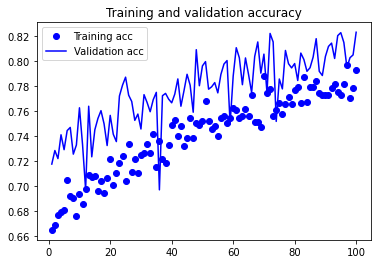

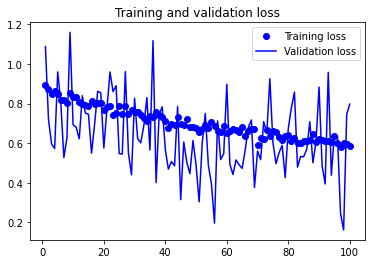

In [29]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

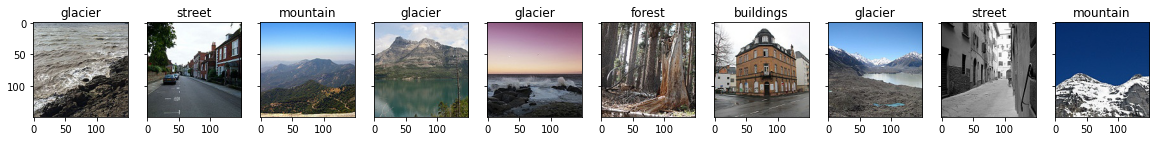

In [34]:
import random
import numpy as np
img_height = 150
img_width =150
dictionary={0:'buildings',1:'forest',2:'glacier',3:'mountain',4:'sea',5:'street'}

fig, ax=plt.subplots(1, 10, figsize=(20,10),sharey=True)
path='seg_pred'
for i,axis in zip(range(10),ax):
    img_name=random.choice(os.listdir(path))
    img=plt.imread(path+'/'+img_name)
    
    axis.imshow(img)
    img_reshape=np.reshape(img, (1,img_height, img_width,3))
    prediction=model.predict_classes(img_reshape)
    #print(prediction)
    prediction_class=dictionary[int(prediction)]
    axis.set_title(prediction_class)